In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### MISSING VALUES

In [3]:
# NaN : Not a Number
# Steve Hoca: Eda dan sonra yapacağımız şey eksik değerlere çözüm bulmak
# Steve Hoca: Çözüm için net bir metot yok(Veriden veriye değişiklik gösteriyor)

#Types of missing values
# 1.Tamamen rasgele olarak oluşmuş. #  Missing completely at random(MCAR)
    ###.Follow no discernable pattern
    ###.Cannot be predicted from the remaining know variable
    ###.Example: data generated explicitly at random or survey data using a random subset of questions from a pre-defined list
# 2.Missing at Random(MAR)
    ### Errors with recording the data correctly
    ### Can roughly be interpolated from remaining values to a reasonable degree of accuracy
    ### Example: A sensor that misses a particular minutes measurements
# 3.Missing not at random(MNAR)
    ### Why the data is missing is known
    ### Can not effectively be inferred or predicted
    ### Example: people in a certain age/income brackert refuse to answer how many houses or cars they have
# 4.Structurally missing
    ### The missing data is missing for an apparent reason
    ### Mechanism that caused the missing data is easily inferred
    ### Example: a survey  that asks for income from employment would have missing values for those who don't have a job

# Missing Value neden oluşur?
# 1.Manuel girerken oluşabilir
# 2.Cihazdan alıyorsak veriyi (cihazda hata vs)
# 3.Yanlış ölçümler

# Handling with missing values?
# 1.Eksik veriyi drop etmek:(Birkaç eksik değer varsa ve çok fazla veriye sahipseniz bu yöntem kabul edilebilir)
    # Yüzde 70-75  ten fazla eksik değer varsa drop edebiliriz
# 2.Değer atama yöntemleri(Modelde herhangi bir değişiklik yapmadan her zamanki gibi çalışmasına izin veren yaklaşımdır)
    # Replacing (Filling) With Mean/Median/Mode (Imputation)--->can be applied on a feature which has numeric data
    # Assigning An Unique Category--->If a categorical feature has definite number of classes, we can assign another class, numerical same logic
    # Predicting The Missing Values---> we can predict the nulls with the help of a machine learning algorithm like linear regression
    # Using Algorithms Which Support Missing Values--->KNN is a machine learning algorithm which works on the principle of distance measure.
# 3.Eksik değerleri bırakmak.Kaldırmamak(Bu yöntemler veriyi sınırlandırır. BIZ BUNU KULLANMAYACAĞIZ)
# ÖNEMLİ NOT: Eksik değerle işlem yaparken en önemli nokta :DOMAIN BİLGİSİ : 
# Bilmediğimiz domaini(alanı) konu hakkında bilgi sahibi biriyle vs konuşmalı ya da araştırma yapmalıyız.

# Biz bu 3 yöntemi kullanacağız
# 1.Countinuous: mean, median, mode
# 2.Categorical: mode
# 3.Other Methods: ffill(forward fill), bfill(back fill), interpolate()
# NOT: Gruplama yaparak doldurmak daha mantıklı olacaktır. Titanic veri seti için düşünelim:
# Hayatta kalanların yaş ortalamaları ile yaşı, hayatta kalmayanların yaş ortalamaları ile yaşı doldurmak gibi
# Yani yaşı direk kendi ortalaması ile doldurmak yerine 1 ve 0 lara göre ortalama alarak doldurmalıyız

In [4]:
id_no = ["P001", "P002", "P003", "P004", "P005", "P006", "P007", "P008", "P009", "P010", "P011"]
gender = ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M"]
status = ["FT", "PT", "-", "FT", "PT", "PT", "FT", "-", "PT", "FT", np.nan]
dept = ["DS", "FS", "AWS", "AWS", "DS", None, "FS", "FS", np.nan, "DS", "AWS"]
V1 = np.array([2, 3, 5, np.nan, 7, 1, np.nan, 10, 14, "-", 6])
V2 = np.array([8, np.nan, 5, 8, 11, np.nan, np.nan, 2, 3, 7, 9])
salary = np.array([np.nan, 54, 59, 120, 58, 75, None, 136, 60, 125, np.nan])

df = pd.DataFrame({"id" : id_no,"gender": gender,"status": status,"dept": dept,"var1" : V1,"var2" : V2,"salary" : salary})
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [5]:
type(None) # NoneType # NOTE: Bazı yerlerde "None" yazmak veri tiplerinden dolayı o sütunu doldurmaya çalışırken 
           # .. hata döndürebilir. O yüzden "None" ları "np.NaN" a çevirmemiz gerekebilir

NoneType

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     object 
 2   status  10 non-null     object 
 3   dept    9 non-null      object 
 4   var1    11 non-null     object 
 5   var2    8 non-null      float64
 6   salary  8 non-null      object 
dtypes: float64(1), object(6)
memory usage: 744.0+ bytes


In [7]:
df["var1"] = df["var1"].replace(to_replace="-",value=np.nan).astype(float)  # df['var1'].map({"-":np.nan})
df["var1"]

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     object 
 2   status  10 non-null     object 
 3   dept    9 non-null      object 
 4   var1    8 non-null      float64
 5   var2    8 non-null      float64
 6   salary  8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 744.0+ bytes


In [9]:
df["status"] = df["status"].replace("-",np.nan)
df["status"]

0      FT
1      PT
2     NaN
3      FT
4      PT
5      PT
6      FT
7     NaN
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [10]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     object 
 2   status  8 non-null      object 
 3   dept    9 non-null      object 
 4   var1    8 non-null      float64
 5   var2    8 non-null      float64
 6   salary  8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 744.0+ bytes


##### Detecting Missing Values

In [12]:
# df.isnull()                   # 2. yol: df.isna()  #  Null olanlar # NaN/nan/None olan değerleri "True", olmayanları "False" 
# df.notnull()                  # 2. yol: df.notna() # Null olmayanlar # NaN/nan/None olan değerleri "False", olmayanları "True"
# df.isnull().any()             # DEFAULT axis=0 # Herhangi bir sütunda Null değer var mı gösteriyor
# df.isnull().any(axis=1)       # Sütunlar boyunca satır bazında bakıyor. Örn; 0. indexteki satırda null değer var mı? --> True
df.isnull().sum()               # DEFAULT axis=0 # Satır bazında bakıp sütunlarda kaç tane null değer var gösteriyor
# df.isnull().sum().sum()       # Tüm dataframe de kaç tane null değer var gösteriyor
# df.salary.isnull()            # Seriye isnull uyguladık # Salary sütunu için satır satır null olup olmadığını gösteriyor 
# df.salary.isnull().any()      # Salary sütununda null değer var mı gösteriyor
# df.salary.isnull().sum()      # Salary sütununda toplam kaç tane null değer olduğunu gösteriyor
# df.isnull().sum()/len(df)*100     # Sütunların yüzde kaçı null gösterir.
# df[df.isnull().any(axis=1)]       # True olan satırları alarak, sütunları(axis=1) getirsin
# df[~df.isnull().any(axis=1)]      # Tilda işareti :Kendisinden sonra gelenin tam tersini yap("NOT" anlamında)
# df.loc[df.dept.isnull(),"salary"] # dept sütununda boş olan yerlere denk gelen satırlardaki salary leri getirdi

id        0
gender    0
status    3
dept      2
var1      3
var2      3
salary    3
dtype: int64

#### Handling Missing Values

###### 1 - Dropping

###### 1.a.Dropna()

dropna(axis=0, how="any", thresh=None, inplace=False)

In [13]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [14]:
df.dropna(axis=0, how="any", thresh=None, inplace=False)
# how="any": df in herhangi bir satırında(axis=0) bir tane bile NaN varsa bunları drop edelim

,id,gender,status,dept,var1,var2,salary
4,P005,M,PT,DS,7.0,11.0,58


In [15]:
df.dropna(axis=1, how="any", thresh=None, inplace=False)

,id,gender
0,P001,M
1,P002,F
2,P003,M
3,P004,F
4,P005,M
5,P006,F
6,P007,M
7,P008,F
8,P009,M
9,P010,F


In [16]:
df["delete_me"] = np.nan
df

,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,M,FT,DS,2.0,8.0,NaN,NaN
1,P002,F,PT,FS,3.0,NaN,54,NaN
2,P003,M,NaN,AWS,5.0,5.0,59,NaN
3,P004,F,FT,AWS,NaN,8.0,120,NaN
4,P005,M,PT,DS,7.0,11.0,58,NaN
5,P006,F,PT,None,1.0,NaN,75,NaN
6,P007,M,FT,FS,NaN,NaN,None,NaN
7,P008,F,NaN,FS,10.0,2.0,136,NaN
8,P009,M,PT,NaN,14.0,3.0,60,NaN
9,P010,F,FT,DS,NaN,7.0,125,NaN


In [17]:
df.dropna(axis=1, how="all", thresh=None, inplace=True)
df
# how = "all": Sütunlarda(axis=1) tüm değerleri NaN olan varsa drop et("delete_me" sütunu)

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [18]:
df.notnull().sum()

id        11
gender    11
status     8
dept       9
var1       8
var2       8
salary     8
dtype: int64

In [19]:
df.dropna(axis=1, how="all", thresh=9, inplace=False) # 9 ve fazla NaN olmayan değer varsa, o sütunu drop etme.
# NOT: thresh için bir sayı bir sayı belirlediysek, "how" argümanını kullanmamız bir anlam ifade etmez
# Fonksiyon thresh argümanında belirtilen koşulu öncelik olarak alır

,id,gender,dept
0,P001,M,DS
1,P002,F,FS
2,P003,M,AWS
3,P004,F,AWS
4,P005,M,DS
5,P006,F,None
6,P007,M,FS
7,P008,F,FS
8,P009,M,NaN
9,P010,F,DS


###### 1.b.Drop()

drop(axis=0)

In [20]:
df.drop([1,3,5],axis=0)

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
2,P003,M,NaN,AWS,5.0,5.0,59
4,P005,M,PT,DS,7.0,11.0,58
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125
10,P011,M,NaN,AWS,6.0,9.0,NaN


In [21]:
df.drop(["var1","var2"], axis=1)

,id,gender,status,dept,salary
0,P001,M,FT,DS,NaN
1,P002,F,PT,FS,54
2,P003,M,NaN,AWS,59
3,P004,F,FT,AWS,120
4,P005,M,PT,DS,58
5,P006,F,PT,None,75
6,P007,M,FT,FS,None
7,P008,F,NaN,FS,136
8,P009,M,PT,NaN,60
9,P010,F,FT,DS,125


##### 2 - Filling Missing Values (Imputation)

###### 2.a.Filling with a specific value

In [22]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [23]:
df.fillna(0)

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,0
1,P002,F,PT,FS,3.0,0.0,54
2,P003,M,0,AWS,5.0,5.0,59
3,P004,F,FT,AWS,0.0,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,0,1.0,0.0,75
6,P007,M,FT,FS,0.0,0.0,0
7,P008,F,0,FS,10.0,2.0,136
8,P009,M,PT,0,14.0,3.0,60
9,P010,F,FT,DS,0.0,7.0,125


In [24]:
df.var1.fillna(0)

0      2.0
1      3.0
2      5.0
3      0.0
4      7.0
5      1.0
6      0.0
7     10.0
8     14.0
9      0.0
10     6.0
Name: var1, dtype: float64

###### 2.b.Filling with any Proper Value

###### mean() , median()

In [25]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [26]:
df.fillna(df.mean())

C:\Users\cansi\AppData\Local\Temp/ipykernel_24728/634187881.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean())


,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.000,85.875
1,P002,F,PT,FS,3.0,6.625,54.000
2,P003,M,NaN,AWS,5.0,5.000,59.000
3,P004,F,FT,AWS,6.0,8.000,120.000
4,P005,M,PT,DS,7.0,11.000,58.000
5,P006,F,PT,None,1.0,6.625,75.000
6,P007,M,FT,FS,6.0,6.625,85.875
7,P008,F,NaN,FS,10.0,2.000,136.000
8,P009,M,PT,NaN,14.0,3.000,60.000
9,P010,F,FT,DS,6.0,7.000,125.000


In [27]:
df.var1.fillna(df.var1.mean())  # df.var1.mean() : 6.0

0      2.0
1      3.0
2      5.0
3      6.0
4      7.0
5      1.0
6      6.0
7     10.0
8     14.0
9      6.0
10     6.0
Name: var1, dtype: float64

In [28]:
df.fillna({"dept":"other","var1":df.var1.mean(), "var2":df.var2.median()})

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,7.5,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,6.0,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,other,1.0,7.5,75
6,P007,M,FT,FS,6.0,7.5,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,other,14.0,3.0,60
9,P010,F,FT,DS,6.0,7.0,125


###### where()

In [29]:
df.notna()

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,False,True,True,True,True
3,True,True,True,True,False,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,False,False,False
7,True,True,False,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,False,True,True


In [30]:
df.where(cond = df.notna(), other=df.mean(), axis=1)
# Condition da False gördüğü yerlerde ilgili sayısal sütunların ortalamalarına göre atama yaptı

C:\Users\cansi\AppData\Local\Temp/ipykernel_24728/662598580.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.where(cond = df.notna(), other=df.mean(), axis=1)


,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.000,85.875
1,P002,F,PT,FS,3.0,6.625,54
2,P003,M,NaN,AWS,5.0,5.000,59
3,P004,F,FT,AWS,6.0,8.000,120
4,P005,M,PT,DS,7.0,11.000,58
5,P006,F,PT,NaN,1.0,6.625,75
6,P007,M,FT,FS,6.0,6.625,85.875
7,P008,F,NaN,FS,10.0,2.000,136
8,P009,M,PT,NaN,14.0,3.000,60
9,P010,F,FT,DS,6.0,7.000,125


###### interpolate()

2 index arasında tek NaN varsa: Bir üst(örn: 4) ve bir alt(örn: 2) indexe karşılık gelen değerin ortalamasını al ve ara indexe(4 ile 2 arası --> 3. indexe) yazdır

2 index arasında 2 veya daha çok NaN varsa: linspace mantığı ile çalışıyor.Örneğin 2,3,4,5. indexlerdeki değerler 30,NaN,NaN,39 diyelim.Bunu 30, 33,36,39 şeklinde dolduruyor. (np.linspace(30,39,4))

In [31]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [32]:
df.interpolate()  
# Not: "None" şeklinde yazan eksik değerlerde bu işlemiyor
# var2 için --> np.linspace(2,11,4)

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,6.5,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,6.0,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,8.0,75
6,P007,M,FT,FS,5.5,5.0,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,10.0,7.0,125


###### 2.c.Filling the Missing Values of Categorical Variables

In [33]:
df.dept.mode()

0    AWS
1     DS
2     FS
dtype: object

In [34]:
df.dept.fillna(df.dept.mode()[0])

0      DS
1      FS
2     AWS
3     AWS
4      DS
5     AWS
6      FS
7      FS
8     AWS
9      DS
10    AWS
Name: dept, dtype: object

In [35]:
df["dept"].fillna(method="ffill",inplace=True) # Yukardan aşağı dolduruyor
df["dept"]

#  df["dept"].fillna(method="bfill")          # Aşağıdan yukarı dolduruyor

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      DS
6      FS
7      FS
8      FS
9      DS
10    AWS
Name: dept, dtype: object

##### 2.d.Filling by condition & by Group of the Categorical Variables

In [36]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,DS,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,FS,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [37]:
df.loc[df["salary"]>=100, "status"].fillna(df.loc[df["salary"]>=100, "status"].mode()[0], inplace=True)
# inplace=True burada çalışmıyor. Çözüm için alttaki kodu kullanmalıyız(Yani değişkene eşitliyoruz aslında)

In [38]:
df.loc[df["salary"]>=100, "status"] = df.loc[df["salary"]>=100, "status"].fillna(df.loc[df["salary"]>=100, "status"].mode()[0])

In [39]:
df  # status sütununda 7. index FT ile doldu

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,DS,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,FT,FS,10.0,2.0,136
8,P009,M,PT,FS,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [40]:
df.groupby(["status", "dept"])["salary"].transform("mean")

0     125.0
1      57.0
2       NaN
3     120.0
4      66.5
5      66.5
6     136.0
7     136.0
8      57.0
9     125.0
10      NaN
Name: salary, dtype: float64

In [41]:
df["trans_salary"] = df.groupby(["status", "dept"]).salary.transform("mean")
df

,id,gender,status,dept,var1,var2,salary,trans_salary
0,P001,M,FT,DS,2.0,8.0,NaN,125.0
1,P002,F,PT,FS,3.0,NaN,54,57.0
2,P003,M,NaN,AWS,5.0,5.0,59,NaN
3,P004,F,FT,AWS,NaN,8.0,120,120.0
4,P005,M,PT,DS,7.0,11.0,58,66.5
5,P006,F,PT,DS,1.0,NaN,75,66.5
6,P007,M,FT,FS,NaN,NaN,None,136.0
7,P008,F,FT,FS,10.0,2.0,136,136.0
8,P009,M,PT,FS,14.0,3.0,60,57.0
9,P010,F,FT,DS,NaN,7.0,125,125.0


In [42]:
df.salary.fillna(df.trans_salary, inplace=True)
df

,id,gender,status,dept,var1,var2,salary,trans_salary
0,P001,M,FT,DS,2.0,8.0,125.0,125.0
1,P002,F,PT,FS,3.0,NaN,54.0,57.0
2,P003,M,NaN,AWS,5.0,5.0,59.0,NaN
3,P004,F,FT,AWS,NaN,8.0,120.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0,66.5
5,P006,F,PT,DS,1.0,NaN,75.0,66.5
6,P007,M,FT,FS,NaN,NaN,136.0,136.0
7,P008,F,FT,FS,10.0,2.0,136.0,136.0
8,P009,M,PT,FS,14.0,3.0,60.0,57.0
9,P010,F,FT,DS,NaN,7.0,125.0,125.0


### OUTLIERS

In [43]:
# Causes of Outliers
# 1.Data entries errors              : Veri girerken yanlış giriş yapılması
# 2.Measurement/instrument errors    : Cihazda problem olması, Ölçüm yaparken yanlış ölçüm yapması
# 3.Sampling erros                   : Sınıf dengesizliği olduğunda örneklemin sadece bir gruba göre çekilmiş olabilir
# 4.Data processing errors           : Aykırı değerin, veri işleme yaparken ortaya çıkması
# 5.Natural novelties in data        : Olağanüstü olaylarda verilerin değişmesinden kaynaklı(Pandemide satışların aşırı düşmesi)
# 6.Experimental errors              : Veri çekerken, denemeler yaparken ortaya çıkması

# Types of Outliers
# 1.Univariate Outliers              : Tek bir sütuna göre outlier incelemesi
# 2.Multivariate Outliers            : Iki veya daha fazla sütuna göre outlier incelemesi

# Detecting Outliers
# 1.Graphs                           : Box plot, Histogram, Scatter plot
# 2.(IQR) technique                  : Q1- 1.5 x IQR , Q3 + 1.5 x IQR
# 3.Statistical Tests                : Grubbs' test, Chi-square test, Dixon's Q test (Bu kısımla burada ilgilenmeyeceğiz) 

# Handling with Outliers
# 1.Remove the outliers              : 1. Drop etmek 2.TILDA(~) = "NOT"
# 2.Limitation (winsorize)           : Oran belirleyerek belli bir değere baskılamak.
            ### Steve Hoca: Bana bu yöntem mantıklı gelmiyor.Eğer o outlier yerine bir şey ile dolduramıyorsak drop etmeliyiz
# 3.Data transformation              : Verinin ölçeğini değiştirerek outlierları azaltmak/kurtulmak(log, square root)
# 4.Replacing the outliers           : (mean, median, mode)
# 5.Using different analysis methods : Istatistiksel non-parametric testler uygulamak
# 6.Valuing the outliers             : Aykırı değer yerine başka değer vermek

# Guideline for Handling Outliers
# 1.Ölçüm problemi veya veri giriş probleminde düzeltmeye çalışın. Düzelmiyorsa drop/remove ediniz
# 2.Kitlenin/Populasyonun bir parçası olmayan değerleri drop/remove ediniz
# 3.Kitlenin/Populasyonun bir parçası olan değerleri drop etmemelisiniz

In [44]:
df = sns.load_dataset("diamonds")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [45]:
df = df.select_dtypes(include="number")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   price   53940 non-null  int64  
 4   x       53940 non-null  float64
 5   y       53940 non-null  float64
 6   z       53940 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.9 MB


### 1.Detecting Outliers

##### 1.a.Graphs

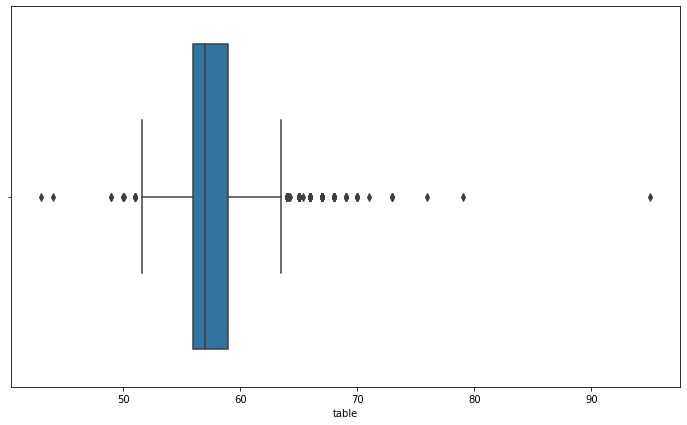

In [46]:
plt.figure(figsize=(12,7))
sns.boxplot(x=df.table);

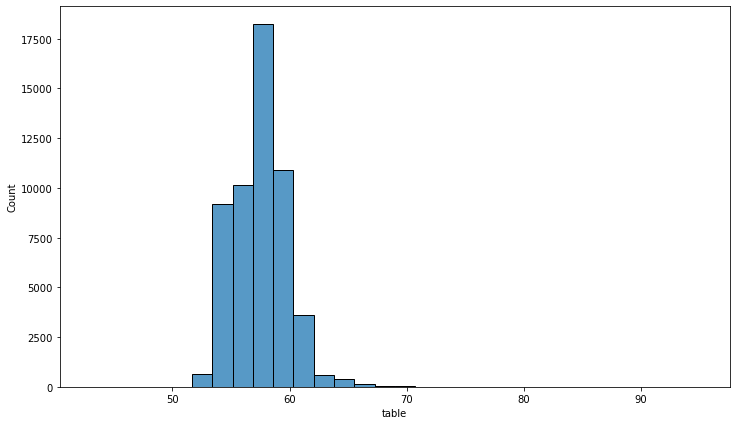

In [47]:
plt.figure(figsize=(12,7))
sns.histplot(df.table, bins=30);

##### 1.b.Detecting Outliers with Tukey's Fences | Tukey's Rule

In [48]:
Q1 = df.table.quantile(0.25)  # OUTPUT: 56
Q3 = df.table.quantile(0.75)  # OUTPUT: 59
IQR = Q3-Q1
IQR

3.0

In [49]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR
lower_lim, upper_lim

(51.5, 63.5)

In [50]:
df.loc[((df.table < lower_lim) | (df.table > upper_lim))]

,carat,depth,table,price,x,y,z
2,0.23,56.9,65.0,327,4.05,4.07,2.31
91,0.86,55.1,69.0,2757,6.45,6.33,3.52
145,0.70,62.1,64.0,2767,5.62,5.65,3.50
219,0.53,57.5,64.0,2782,5.34,5.37,3.08
227,0.84,55.1,67.0,2782,6.39,6.20,3.47
...,...,...,...,...,...,...,...
53695,0.75,59.7,65.0,2717,5.85,5.80,3.48
53697,0.70,64.5,65.0,2717,5.52,5.45,3.54
53756,0.84,55.6,64.0,2724,6.42,6.32,3.54
53757,0.72,55.4,64.0,2724,6.06,5.97,3.34


### 2.Handling Outliers

###### 2.a. Remove Outliers

###### 2.a.1.DROP

In [51]:
drop_index = df.loc[((df.table < lower_lim) | (df.table > upper_lim))].index
drop_index

Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=605)

In [52]:
df.drop(index=drop_index, axis = 0)

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


###### 2.a.2.TILDA(~) = "NOT"

In [53]:
df_cleaned = df.loc[~((df.table < lower_lim) | (df.table > upper_lim))] 
df_cleaned

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


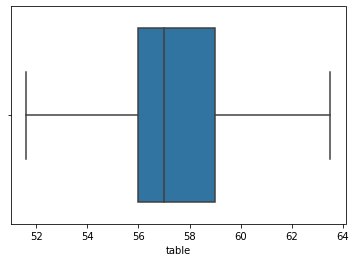

In [54]:
sns.boxplot(x=df_cleaned.table);

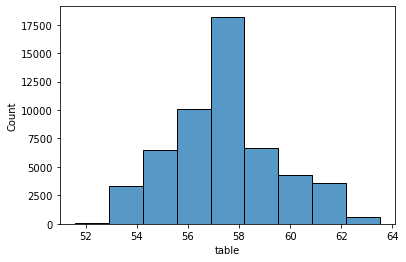

In [55]:
sns.histplot(df_cleaned.table, bins=9, kde=False);   # df_cleaned.table.mean(): 57.62 , # df_cleaned.table.median(): 57.0

###### 2.b. Winsorize

Oran belirleyerek whiskerslara en yakın olan değere baskılamak

In [56]:
from scipy.stats.mstats import winsorize

In [57]:
data = pd.DataFrame({"var1":[-20,-10,3,4,5,6,7,8,9,58],"var2":[11,12,13,14,15,16,17,18,19,20]})
data

,var1,var2
0,-20,11
1,-10,12
2,3,13
3,4,14
4,5,15
5,6,16
6,7,17
7,8,18
8,9,19
9,58,20


In [58]:
Q1 = data.var1.quantile(0.25)
Q3 = data.var1.quantile(0.75)
IQR = Q3-Q1

lower_lim1 = Q1 - 1.5 * IQR
upper_lim1 = Q3 + 1.5 * IQR
lower_lim1, upper_lim1

(-3.5, 14.5)

In [59]:
a1 = len(data.var1[data.var1<lower_lim1])/len(data) # lower_lim den küçük olan değerlerin yüzdesi
b1 = len(data.var1[data.var1>upper_lim1])/len(data) # upper_lim den büyük olan değerlerin yüzdesi
a1,b1
# data.var1.quantile(0.2)    # 0.40
# data.var1.quantile(0.9)    # 13.89

(0.2, 0.1)

In [60]:
winsorize(data.var1, (a1,b1))

masked_array(data=[3, 3, 3, 4, 5, 6, 7, 8, 9, 9],
             mask=False,
       fill_value=999999,
            dtype=int64)

###### 2.c. Transformation using log() method

Verinin ölçeğini değiştirerek outlierları azaltmak/kurtulmak(log, square root)

Steve Hoca: Farklı transformation yöntemleri var ancak en sık kullanılan yöntem log almaktır.

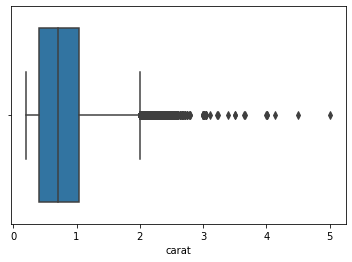

In [61]:
sns.boxplot(x=df.carat);

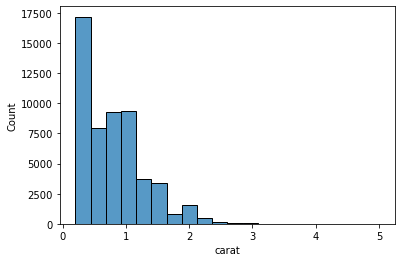

In [62]:
sns.histplot(x=df.carat, bins=20);

In [63]:
carat_log = np.log(df.carat)
carat_log

0       -1.469676
1       -1.560648
2       -1.469676
3       -1.237874
4       -1.171183
           ...   
53935   -0.328504
53936   -0.328504
53937   -0.356675
53938   -0.150823
53939   -0.287682
Name: carat, Length: 53940, dtype: float64

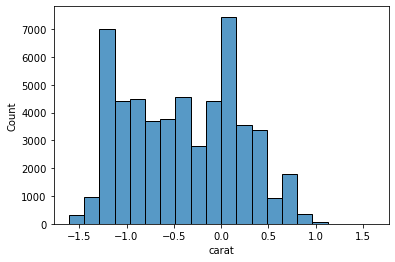

In [64]:
sns.histplot(x=carat_log, bins=20);   # Dağılım değişti.Normal dağılıma yakınlaştı

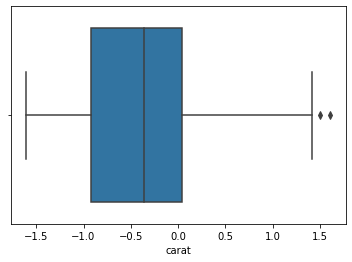

In [65]:
sns.boxplot(x=carat_log);
# Hala elimizde outlier var bunları 1.Drop ya da 2.Tilda kullanarak verimizden çıkartabiliriz

# ÖZET / CHEAT SHEET

In [66]:
# MISSING VALUES
    # Bazı Notlar
        # NaN : Not a Number
        # Steve Hoca: Eda dan sonra yapacağımız şey eksik değerlere çözüm bulmak
        # Steve Hoca: Çözüm için net bir metot yok(Veriden veriye değişiklik gösteriyor)
    # Detecting Missing Values
        # df.isnull().sum()
        # df.notnull().sum()    
    # Handling Missing Values
        # 1.Drop
            # a.dropna(axis=0, how="any", thresh=None, inplace=False)  # NaN değerleri drop
            # b.drop(axis=0)                                           # Satır ya da sütunları drop
                # df.drop(["var1","var2"], axis=1)
        # 2. Filling Missing Values (Imputation)
            # 2.a.Filling with a specific value
                # df.fillna(0)   # df.var1.fillna(0)
            # 2.b.Filling with any Proper Value  #  mean(), median(), where , interpolate()
                # df.fillna(df.mean())
                # df.fillna({"dept":"other","var1":df.var1.mean(), "var2":df.var2.median()})
                # df.where(cond = df.notna(), other=df.mean(), axis=1)     # Çok kullanılmıyor
                # df.interpolate                              # Not: "None" şeklinde yazan eksik değerlerde bu yöntem işlemiyor
                    # 2 index arasında tek NaN varsa: Bir üst(örn: 4) ve bir alt(örn: 2) indexe karşılık gelen değerin
                    # .. ortalamasını al ve ara indexe(4 ile 2 arası --> 3. indexe) yazdır
                    # 2 index arasında 2 veya daha çok NaN varsa: linspace mantığı ile çalışıyor.
                    # .. Örneğin 2,3,4,5. indexlerdeki değerler 30,NaN,NaN,39 diyelim.Bunu 30, 33,36,39 şeklinde dolduruyor.
            # 2.c.Filling the Missing Values of Categorical Variables # mode, ffill, bfill
                # df.dept.fillna(df.dept.mode()[0])
                # df["dept"].fillna(method="ffill")   # Yukardan aşağı dolduruyor
                # df["dept"].fillna(method="bfill")   # Aşağıdan yukarı dolduruyor
            # 2.d.Filling by condition & by Group of the Categorical Variables
                # df["trans_salary"] = df.groupby(["status", "dept"]).salary.transform("mean")
                # df.salary.fillna(df.trans_salary, inplace=True)
        # 3. Keep missing values

In [67]:
# OUTLIERS
    # Detecting Outliers
        # 1.Graphs                           : Box plot, Histogram, Scatter plot
            # sns.boxplot(x=df.table);
            # sns.histplot(x=df.table, bins=20)
        # 2.Tukey's Fences | Tukey's Rule    : IQR method
            # IQR = Q3-Q1
            # Q1- 1.5 x IQR , Q3 + 1.5 x IQR
        # 3.Statistical Tests                : Grubbs' test, Chi-square test, Dixon's Q test (Bu kısımla burada ilgilenmeyeceğiz) 
            # Bunu görmedik
    # Handling with Outliers
        # 1.Remove the outliers          : 1. Drop etmek 2.TILDA(~) = "NOT"
            # a.Drop
                # drop_index = df.loc[((df.table < lower_lim) | (df.table > upper_lim))].index
                # df.drop(index=drop_index, axis = 0)
            # b.Tilda(~)
                # df_cleaned = df.loc[~((df.table < lower_lim) | (df.table > upper_lim))] 
        # 2.Winsorize : Oran belirleyerek whiskerslara en yakın olan değere baskılamak
            # from scipy.stats.mstats import winsorize
            # a1 = len(data.var1[data.var1<lower_lim1])/len(data) # lower_lim den küçük olan değerlerin yüzdesi
            # b1 = len(data.var1[data.var1>upper_lim1])/len(data) # upper_lim den büyük olan değerlerin yüzdesi
            # winsorize(data.var1, (a1,b1))
            # NOT: Steve Hoca: Bana bu yöntem mantıklı gelmiyor.Eğer o outlier yerine bir şey ile dolduramıyorsak drop etmeliyiz
        # 3.Data transformation          : Verinin ölçeğini değiştirerek outlierları azaltmak/kurtulmak(log, square root)
            # carat_log = np.log(df.carat)
            # sns.boxplot(x=carat_log);
            # Hala elimizde outlier var bunları 1.Drop ya da 2.Tilda kullanarak verimizden çıkartabiliriz
        # 4.Replacing the outliers           : (mean, median, mode)
        # 5.Using different analysis methods : Istatistiksel non-parametric testler uygulamak
        # 6.Valuing the outliers             : Aykırı değer yerine başka değer vermek

## Thank you for your time